In [1]:
import mo_gymnasium as gym
import neat
import random
import numpy as np
import matplotlib.pyplot as plt
from neat.parallel import ParallelEvaluator

In [2]:
config_path = 'neat.config'
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, config_path)

In [3]:
env = gym.make("deep-sea-treasure-concave-v0")

obs, info = env.reset()

In [14]:


def evaluate_genome(genome, config):
    net = neat.nn.FeedForwardNetwork.create(genome, config)

    fitness = 0.0
    genome.fitness = 0.0
    # Fitness is a 3D-vector
    for i in range(1):
        next_obs, info = env.reset()
        while True:
            output = net.activate(next_obs)
            action = np.argmax(output)
        
            next_obs, vector_reward, terminated, truncated, info = env.step(action)
            #reward = 10 * vector_reward[0] +10*vector_reward[1] + vector_reward[2]
            fitness += (vector_reward[0] + vector_reward[1])
            if terminated or truncated:
                break
    genome.fitness = float(fitness)/1

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        evaluate_genome(genome, config)


 ****** Running generation 0 ****** 

Population's average fitness: -100.00000 stdev: 0.00000
Best fitness: -100.00000 - size: (4, 0) - species 1 - id 1
Average adjusted fitness: 0.000
Mean genetic distance 1.121, standard deviation 0.894
Population of 200 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   200   -100.0    0.000     0
Total extinctions: 0
Generation time: 0.109 sec

 ****** Running generation 1 ****** 

Population's average fitness: -92.50000 stdev: 26.33913
Best fitness: 0.00000 - size: (4, 1) - species 1 - id 204
Average adjusted fitness: 0.075
Mean genetic distance 2.108, standard deviation 0.981
Population of 200 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   200      0.0    0.075     0
Total extinctions: 0
Generation time: 0.086 sec (0.097 average)

 ****** Running generation 2 ****** 

Population's average fitness: -72.5000

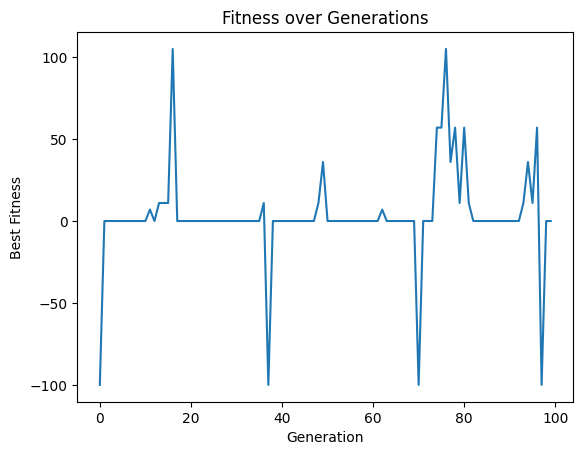

In [15]:
random.seed(42)

p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)

def plot_fitness(stats):
    generation = range(len(stats.most_fit_genomes))
    best_fitness = [c.fitness for c in stats.most_fit_genomes]
    plt.plot(generation, best_fitness)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Fitness over Generations')
    plt.show()


# Run for up to 300 generations.
winner = p.run(eval_genomes, 100)

# Display the winning genome.
print('\nBest genome:\n{!s}'.format(winner))
plot_fitness(stats)
    

In [17]:
eval_episodes = 100
eval_seed_offset = 1000
eval_rewards = []
for j in range(eval_episodes):
    net = neat.nn.RecurrentNetwork.create(winner, config)
    obs, info = env.reset(seed=(eval_seed_offset + j))
    rewards = np.zeros(2)
    done = False
    steps = 0
        
    while not done and steps <= 1000:
        output = net.activate(obs)
        action = np.argmax(output)
        next_obs, reward, terminated, truncated, info = env.step(action)
        rewards = np.add(rewards, reward)
        obs = next_obs
        done = terminated or truncated
        steps += 1

    eval_rewards.append(rewards)
        

print(eval_rewards)

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

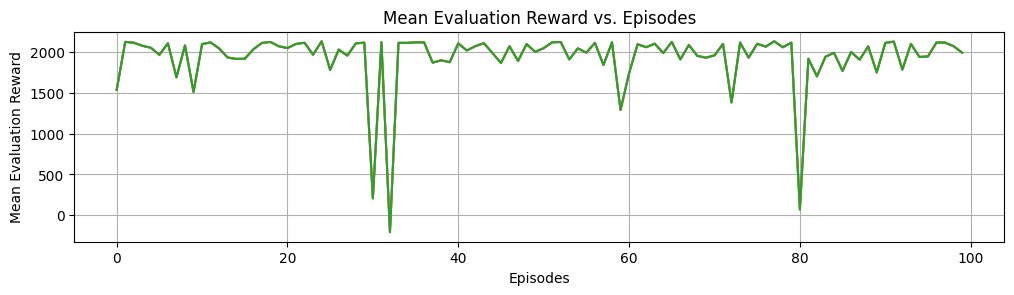

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot([i for i in range(100)], eval_rewards)
plt.xlabel('Episodes')
plt.ylabel('Mean Evaluation Reward')
plt.title('Mean Evaluation Reward vs. Episodes')
plt.grid(True)